<a href="https://colab.research.google.com/github/BenGCollier/CIDM-6356/blob/main/Project_Credit_Card_Fraud_by_Collier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling & Analysis of Machine Learning Algorithms on Credit Card Fraud
By Ben Collier



## Abstract


---




This study aims to compare the performance of different three different machine learning (ML) algorithms in predicting credit card fraud and identifying the key variables influencing their performance. More specifically, the goal for this study is to address and answer three research questions. Those questions ask to determine which model performs the best, what independent variables are most important for fraud prediction, and the relationship to the dependent variable for those independent variables.

Logistic regression, support vector machine (SVM), and random forest algorithms were applied to a dataset comprising credit card transactions. Results indicate that random forest outperformed the other algorithms in terms of accuracy, correctly predicted fraudulent cases, and the precision-recall curve. Furthermore, the analysis identified V4, V12, and V14 as the most influential independet variables in predicting fraud, with V4 having a positive relationship with fraud, while V12 and V14 have a negative relationship.

## Introduction


---



Credit card fraud poses a significant threat to financial institutions and consumers alike. Detecting fraudulent transactions accurately and efficiently is crucial for preventing financial losses. Machine learning algorithms offer a promising approach to tackle this challenge by leveraging patterns and anomalies in transaction data. By evaluating the effectiveness of different ML algorithms in detecting credit card fraud and identifying the key variables driving their performance, the importance of fraud detection through these means is highlighted.

## Literature Review


---



Recent research in credit card fraud detection (CCFD) emphasizes the effectiveness of machine learning (ML) and deep learning techniques at identifying fraudulent transactions.  For instance, works by Fu et al. (2016) and Zorion, et al. (2023) achieve high accuracy in credit card fraud detection using deep learning architectures, while acknowledging the challenges of imbalanced datasets common in fraud scenarios.  Additionally, research by Bodepudi (2021) explores unsupervised anomaly detection methods to identify outliers which might represent fraudulent activity.  These studies highlight the opportunities for researchers to continuously develop and refine ML algorithms to combat increasingly sophisticated fraud attempts.

## Research Questions


---





1.   What machine learning algorithms perform better at predicting credit card fraud?
2.   What three variables contribute the most to the algorithm's performance?
3.   What is the relationship to the dependent variable (Class) of the three most important independent variables? Positive or negative?

## Methodology


---



**Dataset:** The dataset contains a subset of transactions made by European cardholders duringSeptember 2013. The original, full-sized dataset was collected during a research collaboration of the Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) and ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The full-sized dataset (N = 284,807) and list of researchers involved is available at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud. A smaller dataset more amenable to working in Google Colab (N = 10,000) was compiled by Sean Humpherys and includes all the cases of fraud (n = 492) present in the original dataset and a random sampling of non-fraud cases (n = 9508). The dataset is imbalanced with only 4.92% of transactions being fraudlent. The smaller dataset is available at https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv <br><br>
**Dependent Variable:** The dependent variable here is Class. This is a binomial variable that indicates whether a transaction is fraudulent (1) or legitimate (0). <br><br>
**Independent Variables:**<br><br>
*   Time: Amount of time (in seconds) that has passed beginning with the first transaction.
*   V1-V28: PCA dimensionality reduction used to anomymize user identities and other sensitive data.
*   Amount: The transaction amount in Euros for each entry in the dataset.

**Algorithms:** In this analysis, logistic regression, support vector machine (SVM), and random forest algorithms will be used. As for performance measures, a confusion matrix will be generated, and AUC ROC and precision-recall Curves will be plotted.<br><br>



## Results


---



**Descriptive Statistics:** Firstly, df.describe is used in the code cell below to give the reader some basic information about the dataset.

In [ ]:
# Load the credit card data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,94556.430200,-0.232423,0.179783,-0.357002,0.212654,-0.124602,-0.070630,-0.261804,0.034599,-0.111454,...,0.034720,0.003403,-0.000442,-0.009036,-0.005892,0.001819,0.009840,0.004504,88.343145,0.049200
std,47476.185696,2.591826,1.970276,2.599102,1.802081,1.894479,1.400646,2.284173,1.848990,1.333441,...,1.112734,0.771793,0.637262,0.609786,0.538342,0.482085,0.484606,0.335693,224.618573,0.216296
min,0.000000,-30.552380,-29.336007,-31.103685,-4.790224,-22.105532,-17.282140,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.535092,-7.263482,-8.307955,0.000000,0.000000
25%,54051.750000,-1.008727,-0.567822,-1.074893,-0.806092,-0.724259,-0.820519,-0.624710,-0.210099,-0.713535,...,-0.221082,-0.539801,-0.168963,-0.361972,-0.328923,-0.330272,-0.069869,-0.052267,4.937500,0.000000
50%,85083.500000,-0.061033,0.111359,0.081684,0.055539,-0.057702,-0.301126,0.020360,0.030040,-0.075087,...,-0.018758,0.008368,-0.012581,0.034864,0.017182,-0.048559,0.004797,0.012732,21.000000,0.000000
75%,139004.750000,1.281665,0.896952,0.966433,0.900644,0.637133,0.374729,0.576932,0.356684,0.578514,...,0.204659,0.525961,0.153982,0.429143,0.353553,0.255971,0.106253,0.086981,79.000000,0.000000
max,172768.000000,2.398119,22.057729,3.770236,12.114672,28.516513,15.323769,15.915767,20.007208,7.929051,...,27.202839,8.361985,13.750136,3.951679,2.782860,2.859167,4.610936,15.373170,5627.060000,1.000000


In the cell below, more descriptive statistics are obtained. Specifically, 4 things are counted/checked. Those being the number of fraudulent and legitimate records, checking for legitimate values, and checking if Class is strictly coded as zero and one.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv')

# 1. Count the number of fraudulent records
fraudulent_records = df[df['Class'] == 1]
num_fraudulent_records = len(fraudulent_records)
print("Number of fraudulent records:", num_fraudulent_records)

# 2. Count the number of legitimate records
legitimate_records = df[df['Class'] == 0]
num_legitimate_records = len(legitimate_records)
print("Number of legitimate records:", num_legitimate_records)

# 3. Check for missing values
missing_values = df.isnull().sum().any()
if missing_values:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

# 4. Check if Class is coded as only zero and one
unique_classes = df['Class'].unique()
if len(unique_classes) == 2 and 0 in unique_classes and 1 in unique_classes:
    print("Class is coded as only zero and one.")
else:
    print("Class is not coded as only zero and one.")

Number of fraudulent records: 492
Number of legitimate records: 9508
There are no missing values in the dataset.
Class is coded as only zero and one.


From the results above, it is clear to see that the dataset is clean and working as intended. With all 10,000 records present, no missing values, and both the number of fraudulent and legitimate records are correctly assigned. Also, there are no invalid records for the binomial dependent variable, Class, which is ideal.

### Results for Research Question 1
**What machine learning algorithms perform better at predicting credit card fraud?**

Beginning with logistic regression, the code for the model and the confusion matrix is below. Each code cell is separated to be able to run any of the models independently, if desired.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv')

# Separate features (independent variables) and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier
logistic_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = logistic_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9915
Confusion Matrix:
 [[1903    8]
 [   9   80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1911
           1       0.91      0.90      0.90        89

    accuracy                           0.99      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.99      0.99      0.99      2000



Based on the results above, 80 cases are correctly reported to be fraudulent for logistic regression. The next model is SVM, the code for the model and its confusion matrix is shown below.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv')

# Separate features (independent variables) and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.991
Confusion Matrix:
 [[1908    3]
 [  15   74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1911
           1       0.96      0.83      0.89        89

    accuracy                           0.99      2000
   macro avg       0.98      0.91      0.94      2000
weighted avg       0.99      0.99      0.99      2000



SVM predicted 74 cases of fraud correctly based on the confusion matrix above. Finally, the last model used in this analysis is random forest, the code for it and the confusion matrix is shown below.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv')

# Separate features (independent variables) and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
random_forest_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = random_forest_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.994
Confusion Matrix:
 [[1907    4]
 [   8   81]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1911
           1       0.95      0.91      0.93        89

    accuracy                           0.99      2000
   macro avg       0.97      0.95      0.96      2000
weighted avg       0.99      0.99      0.99      2000



From the results above, random forest predicted 81 cases of fraud correctly with an accuracy 0f 99.4%. Additionally, based on those two metrics, it is clear that the random forest model peforms the best out of the three. Although, there is still more to consider as ROC curves and precision-recall curves will be interpreted for each model

**ROC Curves and Precision-Recall Curves**: Below are the ROC curve and precision-recall curve for each model, starting with logistic regression.

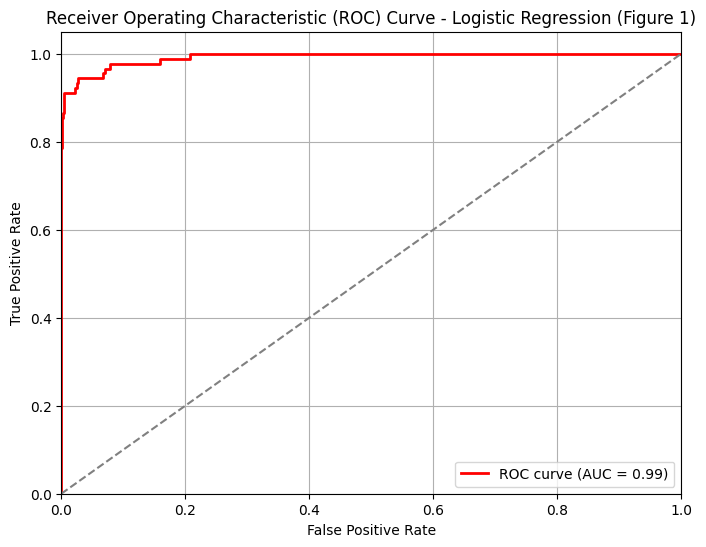

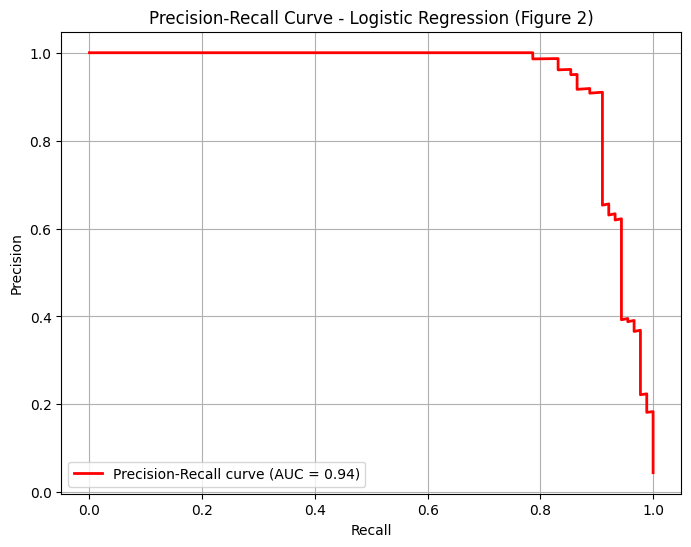

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for logistic regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute precision-recall curve and area for logistic regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, logistic_classifier.predict_proba(X_test_scaled)[:, 1])
pr_auc_lr = average_precision_score(y_test, logistic_classifier.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve for logistic regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression (Figure 1)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot precision-recall curve for logistic regression
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='red', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc_lr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression (Figure 2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Both the ROC curve and precision-recall curve perform very well with logistic regression. Both curves for SVM are shown in the code cell below.

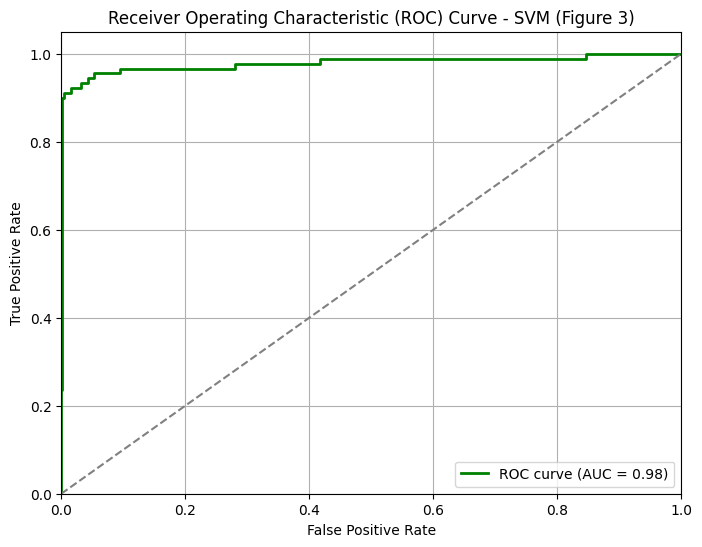

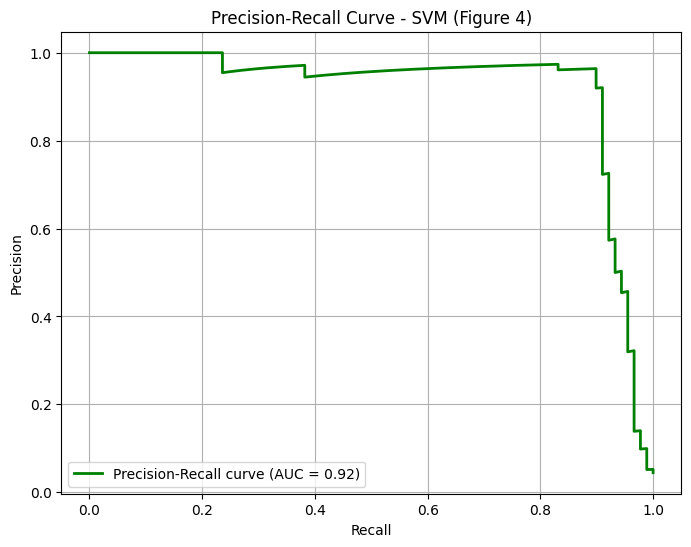

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_classifier.decision_function(X_test_scaled))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Compute precision-recall curve and area for SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_classifier.decision_function(X_test_scaled))
pr_auc_svm = average_precision_score(y_test, svm_classifier.decision_function(X_test_scaled))

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (Figure 3)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot precision-recall curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='green', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc_svm)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM (Figure 4)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Looking at the curves above, both of them perform slightly worse than logistic regression. Although, the curves are still well within range to be considered high-performing. Finally, in the code cell below are the curves for random forest.

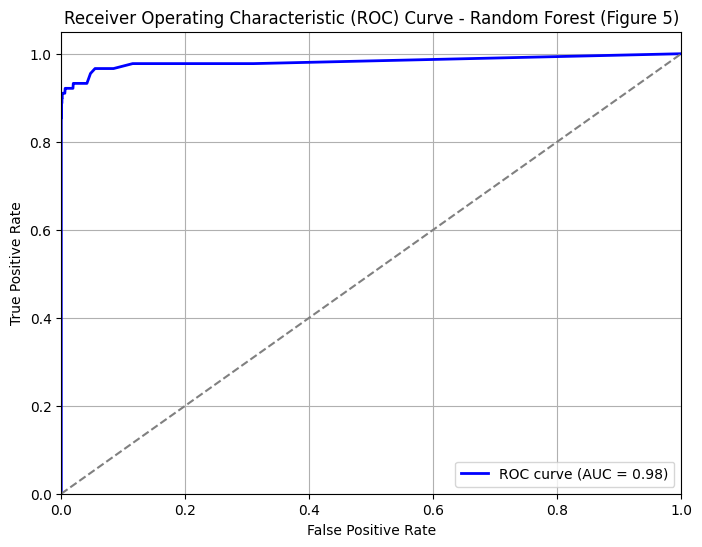

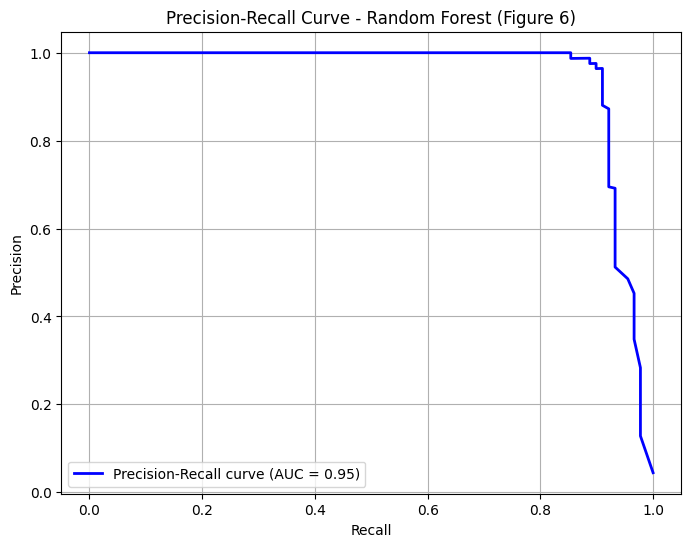

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for random forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute precision-recall curve and area for random forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, random_forest_classifier.predict_proba(X_test_scaled)[:, 1])
pr_auc_rf = average_precision_score(y_test, random_forest_classifier.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve for random forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Figure 5)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot precision-recall curve for random forest
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest (Figure 6)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


The curves for random forest above produced great results. This model has the second-best performance regarding the ROC curvem, and first in performance for the precision-recall curve.

Taking into account the confusion matrix, ROC curve, and precision-recall curve for each model, random forest seems to perform the best. Random forest comes out on top for accuracy, the precision-recall curve, and the most correctly predicted cases of fraud on the confusion matrix. The only performance measure that random forest falls short on is the ROC curve, which is only behind by a negligible amount.

### Results for Research Question 2
**What three variables contribute the most to the algorithm’s performance?**

Here, logistic regression is used again to display the most influential variables in the dataset, sorted from most to least.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv')

# Separate predictors (X) and target variable (y)
# Predictor variables
X = df.drop(columns=['Class'])
# Target variable
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Get the coefficients (weights) of the logistic regression model
coefficients = log_reg.coef_[0]

# Get the feature names
feature_names = X.columns

# Create a DataFrame to display coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to identify the most influential features
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted DataFrame
print(sorted_coefficients_df)

   Feature  Coefficient  Absolute Coefficient
14     V14    -1.487216              1.487216
4       V4     1.435682              1.435682
12     V12    -1.020357              1.020357
10     V10    -0.864195              0.864195
8       V8    -0.644162              0.644162
29  Amount     0.498536              0.498536
1       V1     0.486494              0.486494
22     V22     0.482425              0.482425
16     V16    -0.480960              0.480960
7       V7    -0.450072              0.450072
11     V11     0.397785              0.397785
6       V6    -0.392697              0.392697
5       V5     0.370143              0.370143
13     V13    -0.308219              0.308219
20     V20    -0.279129              0.279129
21     V21     0.249938              0.249938
0     Time    -0.246339              0.246339
17     V17    -0.207411              0.207411
9       V9    -0.200139              0.200139
27     V27    -0.152960              0.152960
18     V18    -0.130892           

From the results above, V14, V4, and V12 are the most important variables when it comes to the algorithm's performance, respectively.

### Results for Research Question 3
**What is the relationship to the dependent variable (Class) of the three most important independent variables? Positive or negative?**

In this final code cell below, the three most important independent variables are shown how they relate to the dependent variable with either a positive or negative value.

In [ ]:
# Get the three most important independent variables
top_three_variables = sorted_coefficients_df.iloc[:3]['Feature']

# Filter the coefficients DataFrame for the top three variables
top_three_coefficients = coefficients_df[coefficients_df['Feature'].isin(top_three_variables)]

# Display the coefficients for each of the top three variables
for index, row in top_three_coefficients.iterrows():
    variable = row['Feature']
    coefficient = row['Coefficient']
    print(f"The relationship between Class and {variable} is {coefficient}.")

The relationship between Class and V4 is 1.4356824280856646.
The relationship between Class and V12 is -1.0203566304300995.
The relationship between Class and V14 is -1.4872157399513424.


From the results above, only V4, the second most important independent variable, has a positive relationship with Class. On the other hand, V12 and V14 have a deeply negative relationship with Class, surprisingly enough.

## Conclusion


---



This study highlights the effectiveness of three machine learning algorithms in detecting credit card fraud. Random forest outperformed logistic regression and support vector machine in terms of accuracy, correctly predicted fraudulent cases, and the precision-recall curve. Furthermore, the analysis identified V4, V12, and V14 as the most influential variables in predicting fraud, with V4 having a positive relationship with fraud, while V12 and V14 have a negative relationship.

## References


---



<p>Bodepudi, H. (2021) Credit Card Fraud Detection Using Unsupervised Machine Learning Algorithms. International Journal of Computer Trend and Technology. 69 (9) https://www.ijcttjournal.org/2021/Volume-69%20Issue-8/IJCTT-V69I8P101.pdf</p>
<p>Fu, K., Cheng, D., Tu, Y., Zhang, L. (2016). Credit Card Fraud Detection Using Convolutional Neural Networks. In: Hirose, A., Ozawa, S., Doya, K., Ikeda, K., Lee, M., Liu, D. (eds) Neural Information Processing. ICONIP 2016. Lecture Notes in Computer Science(), vol 9949. Springer, Cham. https://doi.org/10.1007/978-3-319-46675-0_531</p>
<p>Zorion, P. K., Sachan, L. , Chhabra, R.,  Pandey, V., Fatima, H., (2023) Credit Card Financial Fraud Detection Using Deep Learning. Available at SSRN: https://ssrn.com/abstract=4629093 or http://dx.doi.org/10.2139/ssrn.4629093</p>


